In [3]:
from pathlib import Path
import cantera as ct
import matplotlib
import scipy
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# parameter values
p0 = 101325  # pressure
T0 = 296  # inlet temperature
phi=0.7 #equivalence ratio
alpha=0.566 #<1 volume fraction
mdot_reactants = 80  # kg/m^2/s
mdot_products = mdot_reactants  # kg/m^2/s

# Mechanism and fuel composition
rxnmech = 'gri30.yaml'  # reaction mechanism file
xh2 = alpha / (1 - alpha) * 1  # xh2 = alpha/(1-alpha)*xc
fuel = {'CH4': 1, 'H2': xh2}
oxidizer = {'O2': 1, 'N2': 3.76}

# Calculation params
width = 0.1  # m domain width
loglevel = 0  # amount of diagnostic output (0 to 5)

In [5]:
# Gas object 1 for the counterflow flame
gas1=ct.Solution(rxnmech)
gas1.TP = T0, p0
#fix the composition of the fuel
gas1.set_equivalence_ratio(phi, fuel, oxidizer)  # hold temperature and pressure constant 

# Create the counterflow premixed flame simulation object
fl1 = ct.CounterflowPremixedFlame(gas=gas1, width=width)
fl1.transport_model = 'multicomponent'
fl1.energy_enabled = True #energy equation
fl1.set_refine_criteria(ratio=3, slope=0.1, curve=0.2, prune=0.02)

# set the boundary flow rates
fl1.reactants.mdot = mdot_reactants
fl1.products.mdot = mdot_products

fl1.set_initial_guess()  # assume adiabatic equilibrium products
fl1.solve(loglevel, auto=True)

In [6]:
# Gas object 2 for the counterflow flame with non equilibrium products
gas2=ct.Solution(rxnmech)
gas2.TP = T0, p0
gas2.set_equivalence_ratio(phi, fuel, oxidizer)  # hold temperature and pressure constant

# Create the flame simulation object
fl2 = ct.CounterflowPremixedFlame(gas=gas2, width=width)
# Set grid refinement parameters
fl2.set_refine_criteria(ratio=3, slope=0.1, curve=0.2, prune=0.02)
# set the boundary flow rates
fl2.reactants.mdot = mdot_reactants
fl2.products.mdot = mdot_products
fl2.products.T =2000 #product temperature, temperature of my project
fl2.products.X =fl1.products.X #composition of the products
fl2.set_initial_guess(equilibrate=False)
print(fl2.products.T)
fl2.solve(loglevel, auto=True)
print(fl2.products.T)

2000.0
2000.0


## Simple example using counterflow premixed flame in Cantera

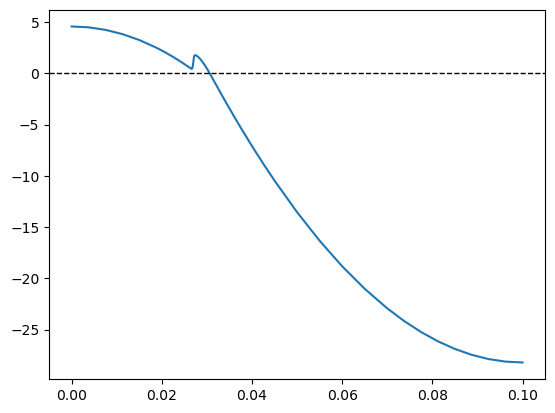

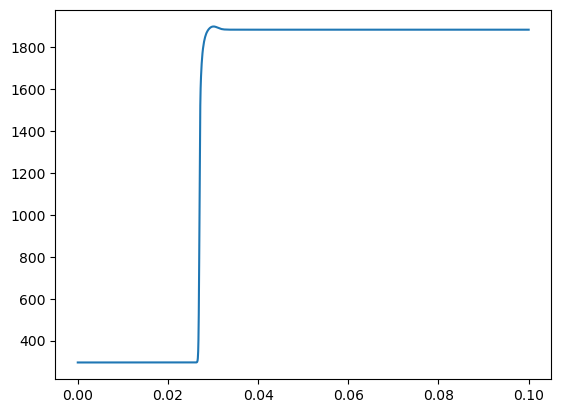

In [7]:
# parameter values
p0 = 101325  # pressure
T0 = 296  # inlet temperature
phi=0.7
alpha=0.566
mdot_reactants = 5 # kg/m^2/s
mdot_products = mdot_reactants  # kg/m^2/s

rxnmech = 'gri30.yaml'  # reaction mechanism file
gas=ct.Solution(rxnmech)
xh2 = alpha / (1 - alpha) * 1  # xh2 = alpha/(1-alpha)*xc
fuel = {'CH4': 1, 'H2': xh2}
oxidizer = {'O2': 1, 'N2': 3.76}
gas.TP = T0, p0
gas.set_equivalence_ratio(phi, fuel, oxidizer)  # hold temperature and pressure constant

width = 0.1  # m
loglevel = 0  # amount of diagnostic output (0 to 5)

# Create the flame simulation object
flame = ct.CounterflowPremixedFlame(gas=gas, width=width)

# Transport model
flame.transport_model = 'multicomponent'

# Energy equation
flame.energy_enabled = True

# Set grid refinement parameters
flame.set_refine_criteria(ratio=3, slope=0.1, curve=0.2, prune=0.02)

# set the boundary flow rates
flame.reactants.mdot = mdot_reactants
flame.products.mdot = mdot_products

flame.set_initial_guess()  # assume adiabatic equilibrium products
flame.solve(loglevel, auto=True)


plt.figure()
plt.plot(flame.grid,flame.velocity)
plt.axhline(y=0, color='k', linestyle='--',linewidth=1) #stagnation line
plt.show()

plt.figure()
plt.plot(flame.grid,flame.T)
plt.show()

#velocity and temperature
#stagnation point(zero); two flows meet
#decrease of velocity(use stretch) -> small jump
#negative velocity(opposite direction)